In [1]:
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022"

D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022


In [2]:
pwd()

'D:\\School\\Graduate 2022 Summer\\Data\\OneDrive_1_7-3-2022'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [4]:
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]

def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
#     output['turnDirection'] = output['magneticHeading'].\
#                                 rolling(window = 5).\
#                                 apply(lambda x: x[-1]-x[0], raw=True).fillna(0)
    
    return output
    

In [5]:
# reading files from 6/30 dataset
first_file = pd.read_csv('SimData_2022.06.30_10.27.04.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
first_file = df_transformation(first_file)


second_file = pd.read_csv('SimData_2022.06.30_13.01.46.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
second_file = df_transformation(second_file)


third_file = pd.read_csv('SimData_2022.06.30_13.05.32.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
third_file = df_transformation(third_file)


fourth_file = pd.read_csv('SimData_2022.06.30_13.42.04.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
fourth_file = df_transformation(fourth_file)

# reading files from 7/7 dataset
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-10-2022"

fifth_file = pd.read_csv('SimData_2022.07.07_09.56.57.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
fifth_file = df_transformation(fifth_file)

# adding this file to balance hover or not
sixth_file = pd.read_csv('SimData_2022.07.07_14.32.46.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
sixth_file = df_transformation(sixth_file)

C:\Users\david\AppData\Local\Temp\ipykernel_8476\3332116753.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\david\AppData\Local\Temp\ipykernel_8476\3332116753.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\david\AppData\Local\Temp\ipykernel_8476\3332116753.py:45: SettingWithCopyWarning: 


D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-10-2022


C:\Users\david\AppData\Local\Temp\ipykernel_8476\3332116753.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\david\AppData\Local\Temp\ipykernel_8476\3332116753.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [6]:
df3 = pd.concat([first_file, second_file, third_file, fourth_file, fifth_file, sixth_file]).reset_index()
df3

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque
0,0,2022-06-30 14:27:53,20.904799,-156.424679,0.140250,203.979900,213.462875,0.049072,0.097064,1.905300,...,0.527175,0.000000,-0.151500,40.843225,38.357400,3.465,12.391625,0.00000,-3.970350,-3.970350
1,1,2022-06-30 14:27:54,20.904799,-156.424678,0.216800,203.925660,213.408580,0.024339,0.051368,2.964420,...,3.419180,0.000000,-0.072440,32.810420,38.088580,3.465,12.357560,0.00000,-2.716340,-2.716340
2,2,2022-06-30 14:27:55,20.904799,-156.424678,0.226078,203.972020,213.454941,0.012431,0.023885,3.027843,...,1.996059,0.000000,-0.021176,34.954039,37.806098,3.465,12.313275,0.00000,-1.561157,-1.561157
3,3,2022-06-30 14:27:56,20.904799,-156.424678,0.192400,204.019700,213.502600,0.026223,0.051913,2.446520,...,-0.771600,0.000000,-0.004020,35.216220,37.557620,3.465,12.299520,0.00000,-0.752000,-0.752000
4,4,2022-06-30 14:27:57,20.904799,-156.424679,0.141633,204.090367,213.573286,0.027774,0.053130,1.583735,...,-2.482204,0.428571,0.011265,38.038878,36.997980,3.465,12.294429,16.09098,0.041959,0.041959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950,995,2022-07-07 18:50:11,44.165597,-68.426752,0.040000,90.299762,74.435667,0.001185,0.002158,2.130952,...,-0.041976,1.000000,-0.007619,-59.941714,-4.772190,3.450,30.271714,0.00000,-0.880405,-0.880405
12951,996,2022-07-07 18:50:12,44.165597,-68.426752,0.040000,90.296614,74.432364,0.001185,0.002235,2.152841,...,-0.040000,1.000000,-0.002500,-60.032114,-5.039273,3.450,30.272886,0.00000,-0.291205,-0.291205
12952,997,2022-07-07 18:50:13,44.165597,-68.426752,0.040000,90.287537,74.423293,0.001185,0.002370,2.173707,...,-0.038951,1.000000,-0.001171,-60.127561,-5.343488,3.450,30.275000,0.00000,0.154951,0.154951
12953,998,2022-07-07 18:50:14,44.165597,-68.426752,0.040000,90.272565,74.408391,0.001185,0.002228,2.194196,...,-0.038457,1.000000,-0.002000,-60.216565,-5.683783,3.450,30.275000,0.00000,0.504109,0.504109


In [7]:
df3['HoverOrNot'] = 0
df3['LeftHover'] = 0
df3['RightHover'] = 0

df3.loc[(df3['datetime'].between('2022-06-30 14:28:13' , '2022-06-30 14:33:12' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:34:10' , '2022-06-30 14:38:29' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:40:10' , '2022-06-30 14:43:40' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:46:00' , '2022-06-30 14:55:55' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:57:10' , '2022-06-30 15:00:16' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:01:20' , '2022-06-30 15:07:03' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:07:38' , '2022-06-30 15:10:38' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:12:02' , '2022-06-30 15:18:30' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:20:18' , '2022-06-30 15:23:52' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:25:30' , '2022-06-30 15:30:17' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:36:45' , '2022-06-30 15:40:24' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:42:28' , '2022-06-30 15:55:20' , inclusive='both')),['HoverOrNot']] = 1



# 6/30 Left Hover
df3.loc[(df3['datetime'].between('2022-06-30 14:29:06' , '2022-06-30 14:30:44' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:36:47' , '2022-06-30 14:38:13' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:40:47' , '2022-06-30 14:42:05' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:57:10' , '2022-06-30 14:57:45' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:59:04' , '2022-06-30 14:59:58' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:17:25' , '2022-06-30 15:18:09' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:39:03' , '2022-06-30 15:40:11' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:44:15' , '2022-06-30 15:45:08' , inclusive='both')),['LeftHover']] = 1


# 6/30 Right Hover

df3.loc[(df3['datetime'].between('2022-06-30 14:31:30' , '2022-06-30 14:32:50' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:34:59' , '2022-06-30 14:36:12' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:42:17' , '2022-06-30 14:43:22' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:57:55' , '2022-06-30 14:58:53' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:37:21' , '2022-06-30 15:38:40' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:42:48' , '2022-06-30 15:44:04' , inclusive='both')),['RightHover']] = 1




# Combine with the new data

df3.loc[(df3['datetime'].between('2022-07-07 13:58:38' , '2022-07-07 14:02:54' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:03:40' , '2022-07-07 14:11:19' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:14:55' , '2022-07-07 14:21:03' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:22:19' , '2022-07-07 14:23:18' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:24:20' , '2022-07-07 14:35:00' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:36:00' , '2022-07-07 14:45:24' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:46:50' , '2022-07-07 14:47:20' , inclusive='both')),['HoverOrNot']] = 1



# 7/7 Right Hover

df3.loc[(df3['datetime'].between('2022-07-07 14:00:15' , '2022-07-07 14:01:20' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:06:20' , '2022-07-07 14:07:12' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:08:46' , '2022-07-07 14:09:39' , inclusive='both')),['RightHover']] = 1
df3.loc[(df3['datetime'].between('2022-07-07 14:10:01' , '2022-07-07 14:10:58' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:20:32' , '2022-07-07 14:20:49' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:23:02' , '2022-07-07 14:23:18' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:39:08' , '2022-07-07 14:39:36' , inclusive='both')),['RightHover']] = 1
df3.loc[(df3['datetime'].between('2022-07-07 14:40:37' , '2022-07-07 14:41:09' , inclusive='both')),['RightHover']] = 1
df3.loc[(df3['datetime'].between('2022-07-07 14:44:10' , '2022-07-07 14:45:06' , inclusive='both')),['RightHover']] = 1
df3.loc[(df3['datetime'].between('2022-07-07 14:46:50' , '2022-07-07 14:47:05' , inclusive='both')),['RightHover']] = 1



# 7/7 Left Hover
df3.loc[(df3['datetime'].between('2022-07-07 14:01:35' , '2022-07-07 14:02:41' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:04:10' , '2022-07-07 14:04:30' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:05:20' , '2022-07-07 14:06:06' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:07:31' , '2022-07-07 14:08:22' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:15:38' , '2022-07-07 14:15:50' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:22:19' , '2022-07-07 14:22:42' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:36:36' , '2022-07-07 14:37:06' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:42:25' , '2022-07-07 14:42:59' , inclusive='both')),['LeftHover']] = 1



# Double check to see hasWeightOnWheels = 1, then set Hover Or Not = 0
df3.loc[(df3['hasWeightOnWheels'] == 1), ['HoverOrNot']] = 0

Checking the data for Hover Or Not, Left Pedal turn, Right Pedal turn data point

In [8]:
print('Hover Or Not')
print(len(df3[(df3['HoverOrNot'] == 1)])) #6310
print(len(df3[(df3['HoverOrNot'] == 0)])) #6645

print('Left Hover')
print(len(df3[(df3['LeftHover'] == 1)])) #814
print(len(df3[(df3['LeftHover'] == 0)])) #12141

print('Right Hover')
print(len(df3[(df3['RightHover'] == 1)])) #838
print(len(df3[(df3['RightHover'] == 0)])) #12117

Hover Or Not
6310
6645
Left Hover
814
12141
Right Hover
838
12117


<h2> Since hover data is only 1/4 of the dataset, hence we have to randomly select the same amount of data for not hover

Prepare data for Hover or Not

In [9]:
# Randomly sample dataset where hoverOrNot is 0
df4 = df3[(df3['HoverOrNot'] == 0)].sample(n=6310, replace=False, random_state=123458)

# Concat data from where HoverOrNot = 1 and HoverOrNot = 0
df5 = pd.concat([df3[(df3['HoverOrNot'] == 1)], df4], ignore_index=True)

# Shuffle data in random way
df5 = df5.sample(frac=1)

# Train Hover Or Not model

In [11]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']               
                
                
X = df5[feature_names]
y = df5['HoverOrNot']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Save scaler transformation to file
# scaler_filename = 'D:/git/rotorcraft-project/david/scaler_trained_model.pkl'
scaler_filename = 'C:/Users/david/git-repo/rotorcraft-project/david/scaler_trained_model.pkl'
pickle.dump(scaler, open(scaler_filename, 'wb'))

X_test = scaler.transform(X_test)

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

# Save model to file
# filename = 'D:/git/rotorcraft-project/david/svm_trained_model.sav'
filename = 'C:/Users/david/git-repo/rotorcraft-project/david/svm_trained_model.sav'
pickle.dump(svm, open(filename, 'wb'))

Accuracy of SVM classifier on training set: 0.94
Accuracy of SVM classifier on test set: 0.95


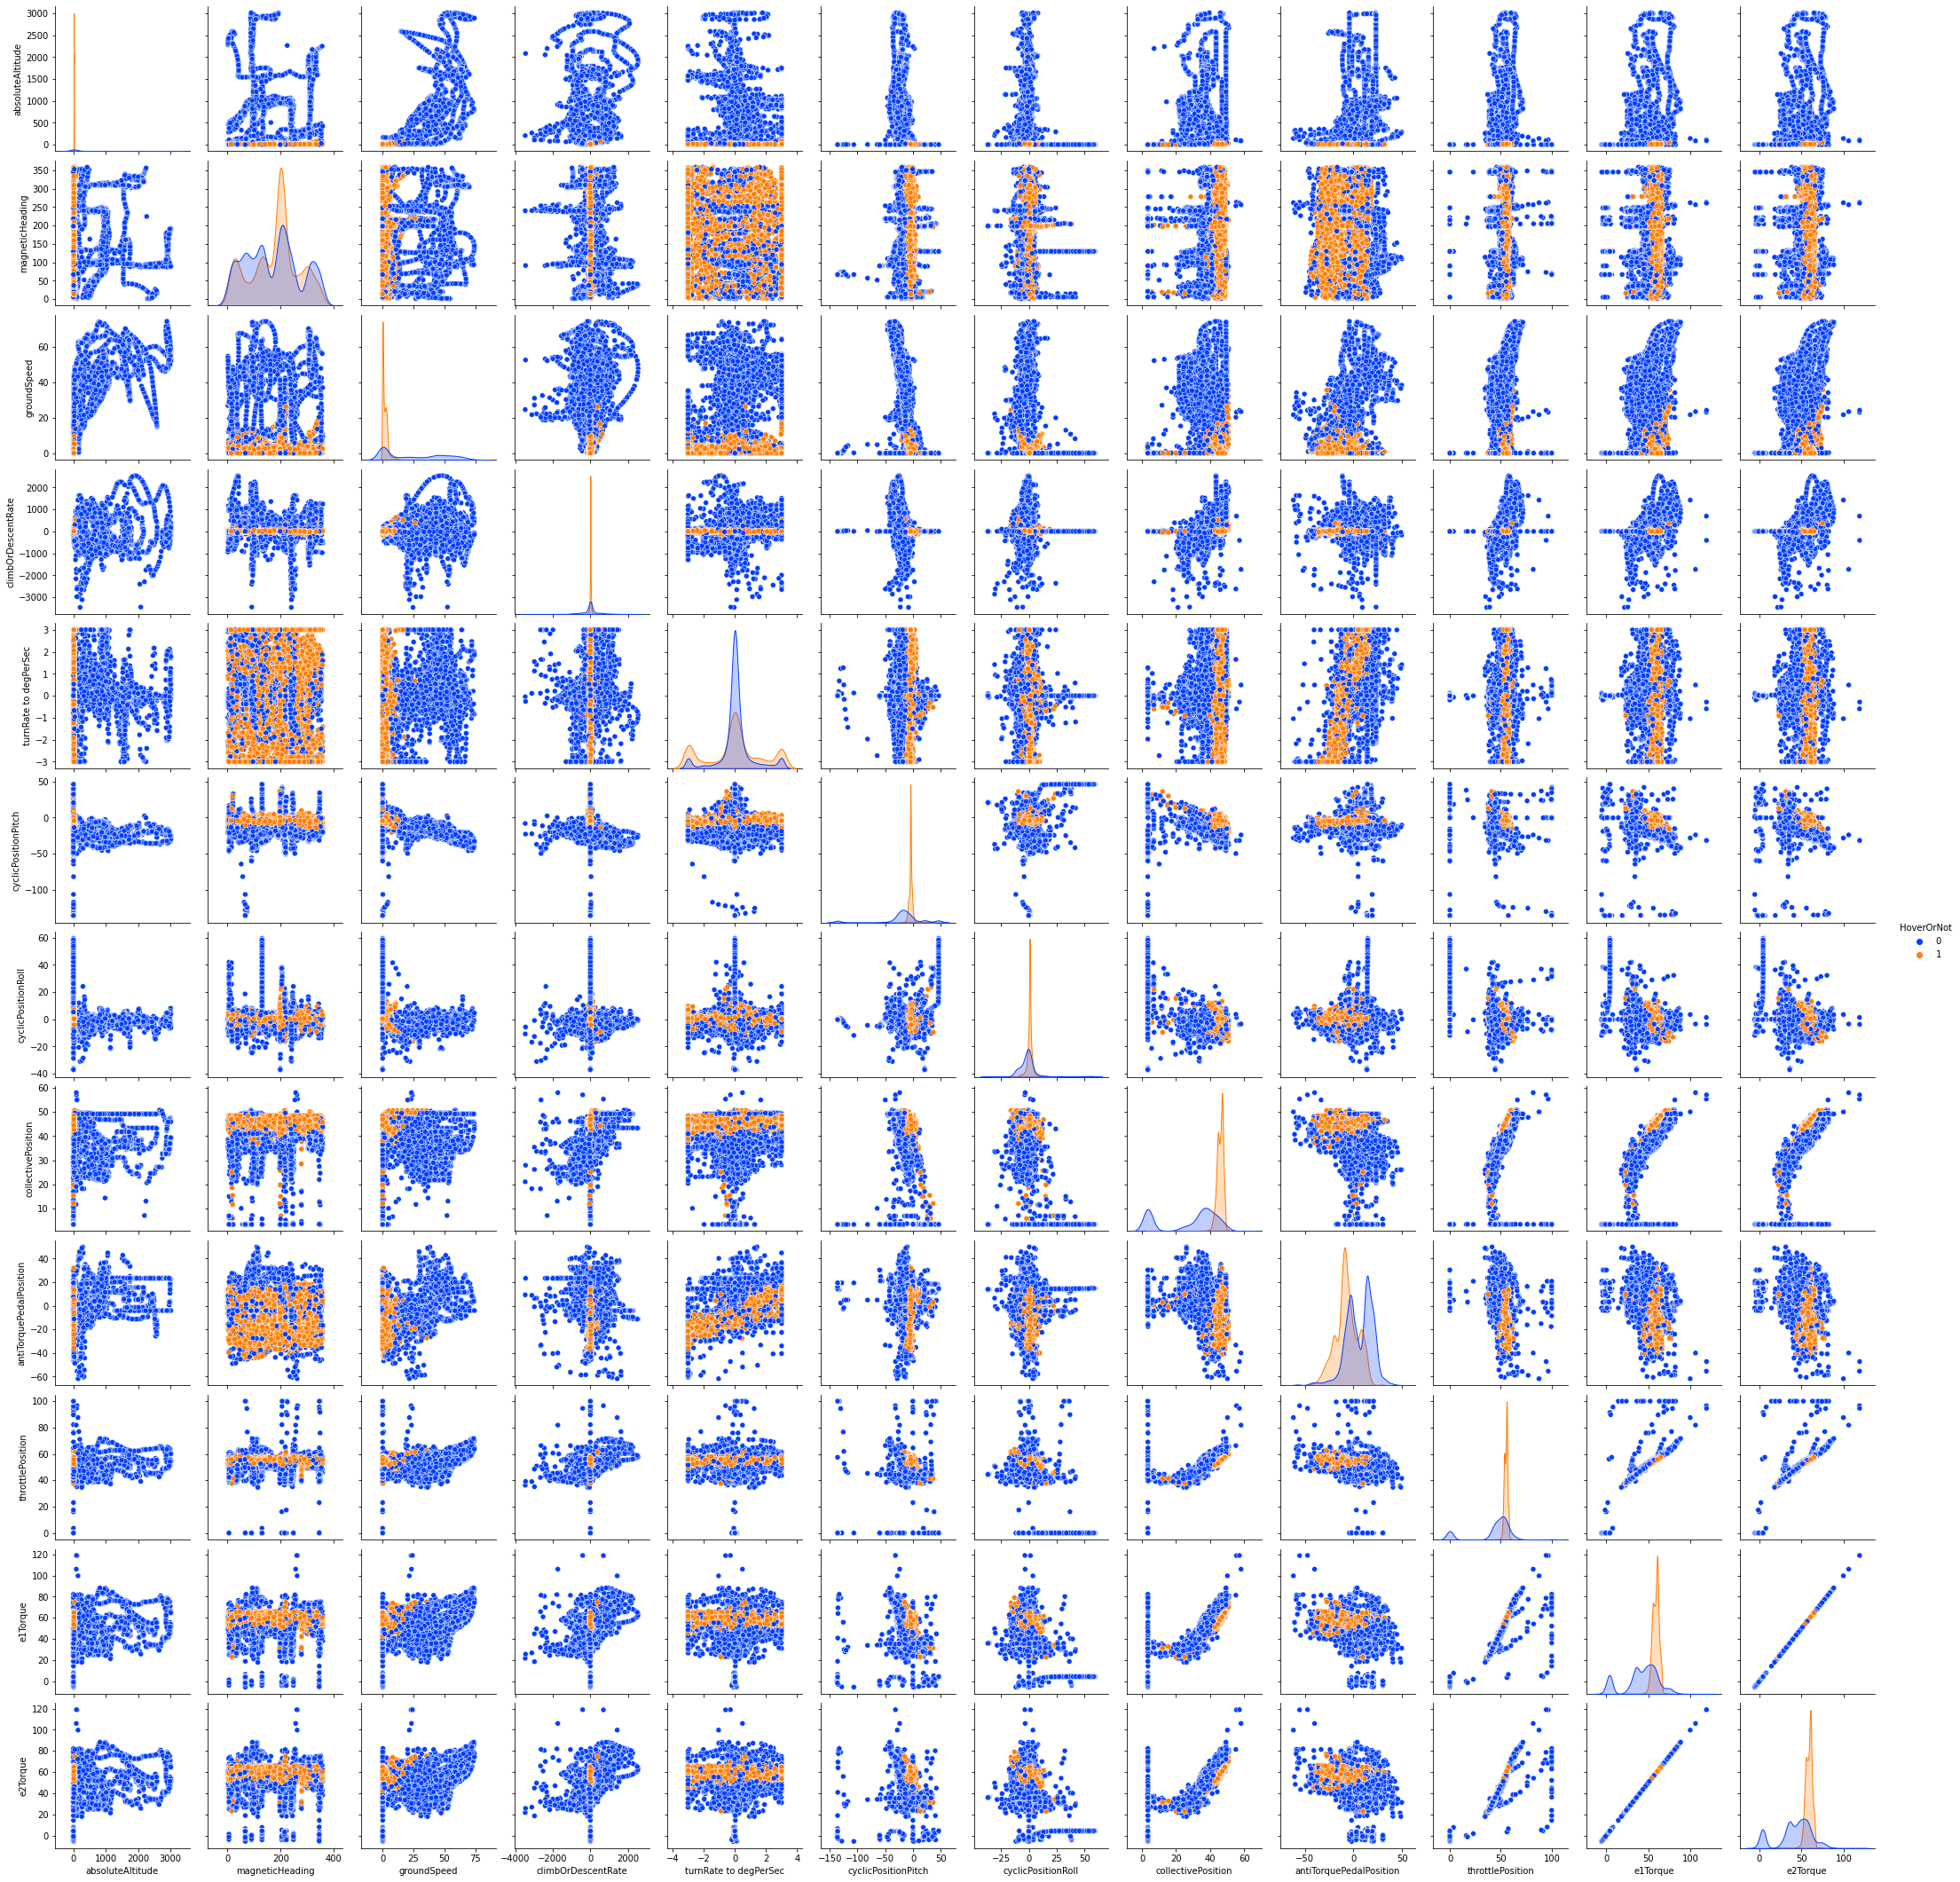

In [46]:
import seaborn as sns

sns.pairplot(a, hue="HoverOrNot",palette="bright")

<h2> Using model to predict the validation file

<H4> Processing the validation file to make it into the same structure

In [12]:
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022"


validation_file = pd.read_csv('SimData_2022.06.30_09.43.28.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
validation_file = df_transformation(validation_file)


validation_file['HoverOrNot'] = 0
validation_file['LeftHover'] = 0
validation_file['RightHover'] = 0

validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:48:11' , '2022-06-30 13:52:20' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:53:15' , '2022-06-30 13:54:18' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:55:29' , '2022-06-30 13:56:15' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:56:23' , '2022-06-30 13:57:13' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:59:00' , '2022-06-30 14:00:14' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:02:12' , '2022-06-30 14:03:50' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:05:25' , '2022-06-30 14:16:45' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:18:10' , '2022-06-30 14:19:34' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:22:40' , '2022-06-30 14:24:40' , inclusive='both')),['HoverOrNot']] = 1


# Right Hover
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:48:49' , '2022-06-30 13:50:05' , inclusive='both')),['RightHover']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:59:20' , '2022-06-30 14:00:06' , inclusive='both')),['RightHover']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:02:38' , '2022-06-30 14:03:28' , inclusive='both')),['RightHover']] = 1


# Left Hover
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:51:58' , '2022-06-30 13:52:20' , inclusive='both')),['LeftHover']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:53:15' , '2022-06-30 13:54:18' , inclusive='both')),['LeftHover']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:55:29' , '2022-06-30 13:56:15' , inclusive='both')),['LeftHover']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:56:23' , '2022-06-30 13:57:13' , inclusive='both')),['LeftHover']] = 1

D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022


C:\Users\david\AppData\Local\Temp\ipykernel_8476\3332116753.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [13]:
X_validation = validation_file[feature_names]
y_validation = validation_file['HoverOrNot']

scaler_loaded_fn = 'C:/Users/david/git-repo/rotorcraft-project/david/scaler_trained_model.pkl'
# scaler_loaded_fn = 'D:/git/rotorcraft-project/david/scaler_trained_model.pkl'
scaler_loaded = pickle.load(open(scaler_loaded_fn, 'rb'))

file_loaded = 'C:/Users/david/git-repo/rotorcraft-project/david/svm_trained_model.sav'
# file_loaded = 'D:/git/rotorcraft-project/david/svm_trained_model.sav'
svm_loaded = pickle.load(open(file_loaded, 'rb'))


X_valid = scaler_loaded.transform(X_validation)

In [14]:
validation_svm = svm_loaded.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y_validation,validation_svm))

Accuracy of Model:: 0.8338658146964856


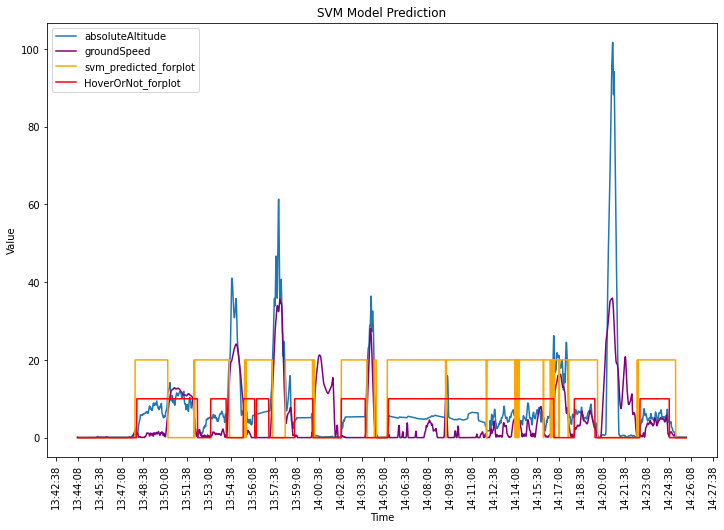

In [15]:
import matplotlib.dates as mdates

validation_file['svm_predicted'] = validation_svm

# Initialize the data
validation_file['HoverOrNot_forplot'] = 0
validation_file['svm_predicted_forplot'] = 0


validation_file['HoverOrNot_forplot'] = validation_file['HoverOrNot'] * 10
validation_file['svm_predicted_forplot'] = validation_file['svm_predicted'] * 20

plt.figure(figsize=(12, 8))
plt.plot('datetime','absoluteAltitude',
         data = validation_file,
         label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = validation_file,
         label = "groundSpeed" , color="purple")
plt.plot('datetime','svm_predicted_forplot',
         data = validation_file,
         label = "svm_predicted_forplot", color="orange")
plt.plot('datetime','HoverOrNot_forplot',
         data = validation_file,
         label = "HoverOrNot_forplot", color="r")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=90))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('SVM Model Prediction')
plt.legend()
plt.show()

<h2> Test again 7/10 file

In [18]:
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-10-2022"

valid_data_710 = pd.read_csv('SimData_2022.07.07_09.29.40.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
validation_file = df_transformation(valid_data_710)


validation_file['HoverOrNot'] = 0
validation_file['LeftHover'] = 0
validation_file['RightHover'] = 0

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:30:49' , '2022-07-07 13:34:28' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:36:10' , '2022-07-07 13:38:05' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:40:44' , '2022-07-07 13:42:14' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:43:40' , '2022-07-07 13:45:07' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:47:03' , '2022-07-07 13:52:09' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:53:12' , '2022-07-07 13:53:55' , inclusive='both')),['HoverOrNot']] = 1



# Right Hover

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:33:15' , '2022-07-07 13:34:15' , inclusive='both')),['RightHover']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:44:03' , '2022-07-07 13:44:49' , inclusive='both')),['RightHover']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:53:13' , '2022-07-07 13:53:50' , inclusive='both')),['RightHover']] = 1

#Left Hover

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:36:46' , '2022-07-07 13:37:45' , inclusive='both')),['LeftHover']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:41:13' , '2022-07-07 13:42:11' , inclusive='both')),['LeftHover']] = 1

D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-10-2022


C:\Users\david\AppData\Local\Temp\ipykernel_8476\3332116753.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [19]:
X_validation = validation_file[feature_names]
y_validation = validation_file['HoverOrNot']


X_valid = scaler_loaded.transform(X_validation)

In [20]:
file_loaded = 'C:/Users/david/git-repo/rotorcraft-project/david/svm_trained_model.sav'
# file_loaded = 'D:/git/rotorcraft-project/david/svm_trained_model.sav'
svm_loaded = pickle.load(open(file_loaded, 'rb'))

In [21]:
validation_svm = svm_loaded.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y_validation,validation_svm))

Accuracy of Model:: 0.8877338877338877


<h1> using rolling window to calculate mean of predicted svm in 20s

In [22]:
validation_file['svm_predicted'] = validation_svm 
result = []
window = [5,10,15,17,20,30]
rolling_mean = [0.5,0.6,0.7]

for i in window:
    for j in rolling_mean:
        temp_validation_file = pd.DataFrame()
        temp_validation_file = validation_file.copy(deep=True)


        temp_validation_file['svm_predicted_rolling_mean'] = temp_validation_file['svm_predicted'].rolling(window = i).mean().fillna(0)
        temp_validation_file['svm_predicted_after_rolling_mean'] = 0

        temp_validation_file.loc[temp_validation_file['svm_predicted_rolling_mean'] > j,['svm_predicted_after_rolling_mean']] = 1

        result.append((i,j,accuracy_score(temp_validation_file['HoverOrNot'],temp_validation_file['svm_predicted_after_rolling_mean'])))

for i in result:
    print('Accuracy Score for %ss rolling windows of with %s rolling mean : %s' %(i[0],i[1],i[2]))
    

Accuracy Score for 5s rolling windows of with 0.5 rolling mean : 0.9050589050589051
Accuracy Score for 5s rolling windows of with 0.6 rolling mean : 0.9078309078309078
Accuracy Score for 5s rolling windows of with 0.7 rolling mean : 0.9078309078309078
Accuracy Score for 10s rolling windows of with 0.5 rolling mean : 0.9293139293139293
Accuracy Score for 10s rolling windows of with 0.6 rolling mean : 0.9286209286209286
Accuracy Score for 10s rolling windows of with 0.7 rolling mean : 0.9279279279279279
Accuracy Score for 15s rolling windows of with 0.5 rolling mean : 0.9507969507969508
Accuracy Score for 15s rolling windows of with 0.6 rolling mean : 0.9494109494109494
Accuracy Score for 15s rolling windows of with 0.7 rolling mean : 0.932085932085932
Accuracy Score for 17s rolling windows of with 0.5 rolling mean : 0.9494109494109494
Accuracy Score for 17s rolling windows of with 0.6 rolling mean : 0.9514899514899515
Accuracy Score for 17s rolling windows of with 0.7 rolling mean : 0.9

In [23]:
validation_file['svm_predicted_rolling_mean'] = validation_file['svm_predicted'].rolling(window = 17).mean().fillna(0)

In [24]:
validation_file['svm_predicted_after_rolling_mean'] = 0

validation_file.loc[validation_file['svm_predicted_rolling_mean'] > 0.6,['svm_predicted_after_rolling_mean']] = 1

In [25]:
print("Accuracy of Model after second processing:",\
      accuracy_score(validation_file['HoverOrNot'],\
                     validation_file['svm_predicted_after_rolling_mean']))

Accuracy of Model after second processing: 0.9514899514899515


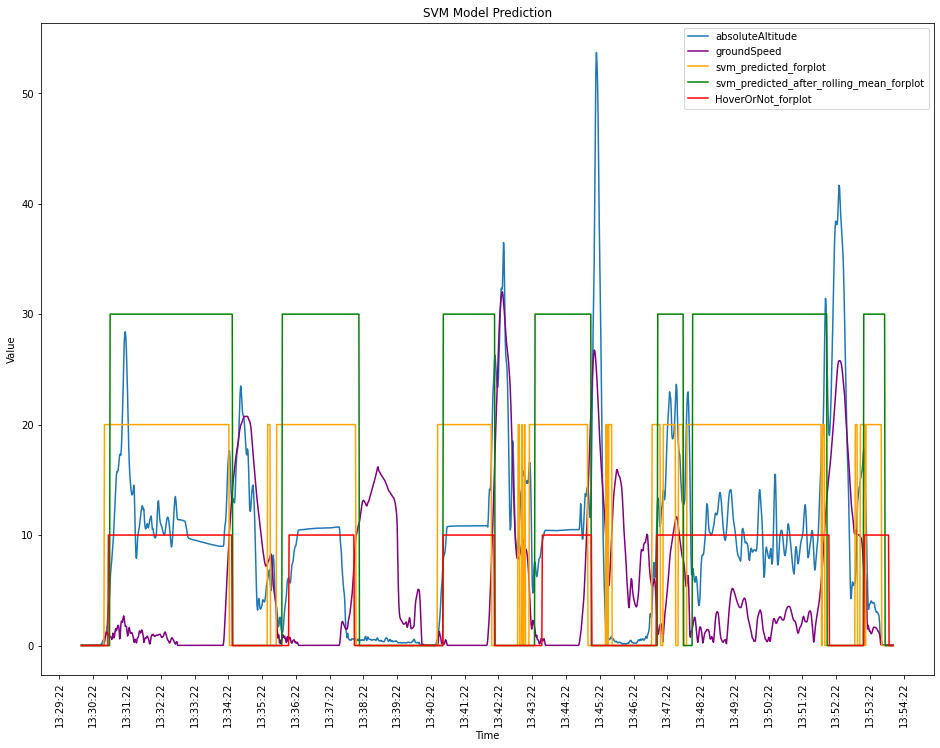

In [26]:
import matplotlib.dates as mdates

# Initialize the data
validation_file['HoverOrNot_forplot'] = 0
validation_file['svm_predicted_forplot'] = 0
validation_file['svm_predicted_after_rolling_mean_forplot'] = 0


validation_file['HoverOrNot_forplot'] = validation_file['HoverOrNot'] * 10
validation_file['svm_predicted_forplot'] = validation_file['svm_predicted'] * 20
validation_file['svm_predicted_after_rolling_mean_forplot'] = validation_file['svm_predicted_after_rolling_mean'] * 30


plt.figure(figsize=(16, 12))
plt.plot('datetime','absoluteAltitude',
         data = validation_file,
         label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = validation_file,
         label = "groundSpeed" , color="purple")
plt.plot('datetime','svm_predicted_forplot',
         data = validation_file,
         label = "svm_predicted_forplot", color="orange")
plt.plot('datetime','svm_predicted_after_rolling_mean_forplot',
         data = validation_file,
         label = "svm_predicted_after_rolling_mean_forplot", color="green")
plt.plot('datetime','HoverOrNot_forplot',
         data = validation_file,
         label = "HoverOrNot_forplot", color="r")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('SVM Model Prediction')
plt.legend(loc=1)
plt.show()

In [31]:
predict_hover = []

for j,i in enumerate(validation_file['svm_predicted_after_rolling_mean']):
    if j == 0:
        predict_hover.append([i,j])
    elif j == len(validation_file['svm_predicted_after_rolling_mean'])-1:
        predict_hover.append([i,j])
    else:
        if i != validation_file['svm_predicted_after_rolling_mean'][j-1]:
            predict_hover.append([validation_file['svm_predicted_after_rolling_mean'][j-1],j-1])
            predict_hover.append([i,j])
            
true_hover = []
for j,i in enumerate(validation_file['HoverOrNot']):
    if j == 0:
        true_hover.append([i,j])
    elif j == len(validation_file['HoverOrNot'])-1:
        true_hover.append([i,j])
    else:
        if i != validation_file['HoverOrNot'][j-1]:
            true_hover.append([validation_file['HoverOrNot'][j-1],j-1])
            true_hover.append([i,j])

arr = []
for i,j in enumerate(predict_hover):
    if i!= 0 and j[0] == predict_hover[i-1][0] and j[0]==10 :
        arr.append(dict(Task="Task Predicted %s"%i,
                        Start=validation_file['datetime'][predict_hover[i-1][1]],
                        Finish=validation_file['datetime'][j[1]],
                        Resource="{}".format("Predicted Hover")
                       )
                  )
for i,j in enumerate(true_hover):
    if i!= 0 and j[0] == true_hover[i-1][0] and j[0]==1 :
        arr.append(dict(Task="Task Validation %s"%i,
                        Start=validation_file['datetime'][true_hover[i-1][1]],
                        Finish=validation_file['datetime'][j[1]],
                        Resource="{}".format("Validation Log Hover")
                       )
                  )
arr

[{'Task': 'Task Predicted 3',
  'Start': Timestamp('2022-07-07 13:30:52'),
  'Finish': Timestamp('2022-07-07 13:34:29'),
  'Resource': 'Predicted Hover'},
 {'Task': 'Task Predicted 7',
  'Start': Timestamp('2022-07-07 13:35:58'),
  'Finish': Timestamp('2022-07-07 13:38:14'),
  'Resource': 'Predicted Hover'},
 {'Task': 'Task Predicted 11',
  'Start': Timestamp('2022-07-07 13:40:44'),
  'Finish': Timestamp('2022-07-07 13:42:15'),
  'Resource': 'Predicted Hover'},
 {'Task': 'Task Predicted 15',
  'Start': Timestamp('2022-07-07 13:43:27'),
  'Finish': Timestamp('2022-07-07 13:45:06'),
  'Resource': 'Predicted Hover'},
 {'Task': 'Task Predicted 19',
  'Start': Timestamp('2022-07-07 13:47:05'),
  'Finish': Timestamp('2022-07-07 13:47:50'),
  'Resource': 'Predicted Hover'},
 {'Task': 'Task Predicted 23',
  'Start': Timestamp('2022-07-07 13:48:07'),
  'Finish': Timestamp('2022-07-07 13:52:05'),
  'Resource': 'Predicted Hover'},
 {'Task': 'Task Predicted 27',
  'Start': Timestamp('2022-07-07 13

In [32]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(arr)

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Resource", color="Resource")
fig.show()